# Image Classification Caltech-256

### Dataset : 
**Caltech-256** is an object recognition dataset containing 30,607 real-world images, of different sizes, spanning 257 classes (256 object classes and an additional clutter class). Each class is represented by at least 80 images. The dataset is a superset of the Caltech-101 dataset.



- http://www.vision.caltech.edu/Image_Datasets/Caltech256/
- https://paperswithcode.com/dataset/caltech-256?fbclid=IwAR1gcV9f8V8LZF_oQ1zaMifuD3FblJtbVK8IrgLNj3m0UsTYvkeYhHcYhqs

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

##### Load image data from the directory

In [2]:

img = tf.keras.preprocessing.image_dataset_from_directory(
    directory=r'E:\STUDY RESOURCES\DATA SCIENCE\P R O J E C T S\Datasets\257_ObjectCategories',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=256,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    #crop_to_aspect_ratio=True,
    ##**kwargs
)

Found 30607 files belonging to 257 classes.


##### Checking all the classes of the dataset

In [3]:
class_names = img.class_names #class_names Used to control the order of the classes
print(class_names)

['001.ak47', '002.american-flag', '003.backpack', '004.baseball-bat', '005.baseball-glove', '006.basketball-hoop', '007.bat', '008.bathtub', '009.bear', '010.beer-mug', '011.billiards', '012.binoculars', '013.birdbath', '014.blimp', '015.bonsai-101', '016.boom-box', '017.bowling-ball', '018.bowling-pin', '019.boxing-glove', '020.brain-101', '021.breadmaker', '022.buddha-101', '023.bulldozer', '024.butterfly', '025.cactus', '026.cake', '027.calculator', '028.camel', '029.cannon', '030.canoe', '031.car-tire', '032.cartman', '033.cd', '034.centipede', '035.cereal-box', '036.chandelier-101', '037.chess-board', '038.chimp', '039.chopsticks', '040.cockroach', '041.coffee-mug', '042.coffin', '043.coin', '044.comet', '045.computer-keyboard', '046.computer-monitor', '047.computer-mouse', '048.conch', '049.cormorant', '050.covered-wagon', '051.cowboy-hat', '052.crab-101', '053.desk-globe', '054.diamond-ring', '055.dice', '056.dog', '057.dolphin-101', '058.doorknob', '059.drinking-straw', '060.du

#### Visualize the data

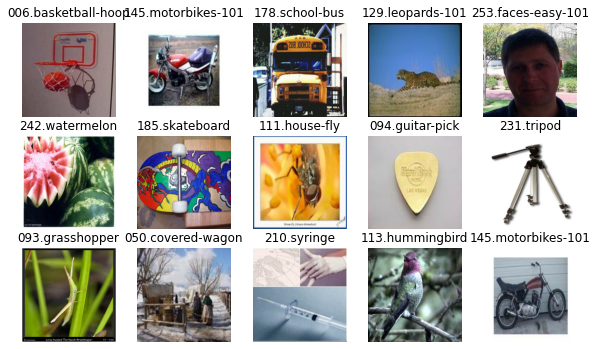

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in img.take(1):
    for i in range(15):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### Data Splitting into Train dataset and Validation dataset

In [5]:
image_size = (150, 150)
num_classes = 257
img_height,img_width=150,150

In [6]:
train_datagen = image.ImageDataGenerator(rescale = 1./255)
val_datagen = image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [7]:
train_data = train_datagen.flow_from_directory(r'E:\STUDY RESOURCES\DATA SCIENCE\P R O J E C T S\Datasets\257_ObjectCategories',                                                    
                                                    subset="training",
                                                    batch_size = 128,
                                                    class_mode = 'categorical', 
                                                    target_size = image_size)

Found 30607 images belonging to 257 classes.


In [8]:
validation_data = val_datagen.flow_from_directory(r'E:\STUDY RESOURCES\DATA SCIENCE\P R O J E C T S\Datasets\257_ObjectCategories',
                                                    subset = "validation",
                                                    batch_size = 128,
                                                    class_mode = 'categorical', 
                                                    target_size = image_size)

Found 6027 images belonging to 257 classes.


# Creating Sequential CNN Model including regularization techniques ( Without Augmentation)

In [9]:
num_classes = 257
img_height,img_width=150,150
input_shape=(img_height, img_width, 3)

model = Sequential()

model.build(input_shape)

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape= input_shape))

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.05))



model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.05))



model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.05))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))


model.add(Dense(num_classes,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        1

In [12]:

model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=1,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=1,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [14]:
history = model.fit_generator(train_data, validation_data = validation_data, epochs=5, callbacks=callbacks_list, verbose=1)

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
240/240 [==============================] - 440s 2s/step - loss: 5.2796 - accuracy: 0.0761 - val_loss: 5.9188 - val_accuracy: 0.0063
Epoch 2/5
240/240 [==============================] - 386s 2s/step - loss: 4.7894 - accuracy: 0.1320 - val_loss: 11.8208 - val_accuracy: 0.0063
Restoring model weights from the end of the best epoch.

Epoch 00002: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 00002: early stopping


In [15]:
val_loss, val_acc = model.evaluate(validation_data, verbose=1)

#### Plot the result on validation data

48/48 [==============================] - 17s 343ms/step - loss: 5.9188 - accuracy: 0.0063


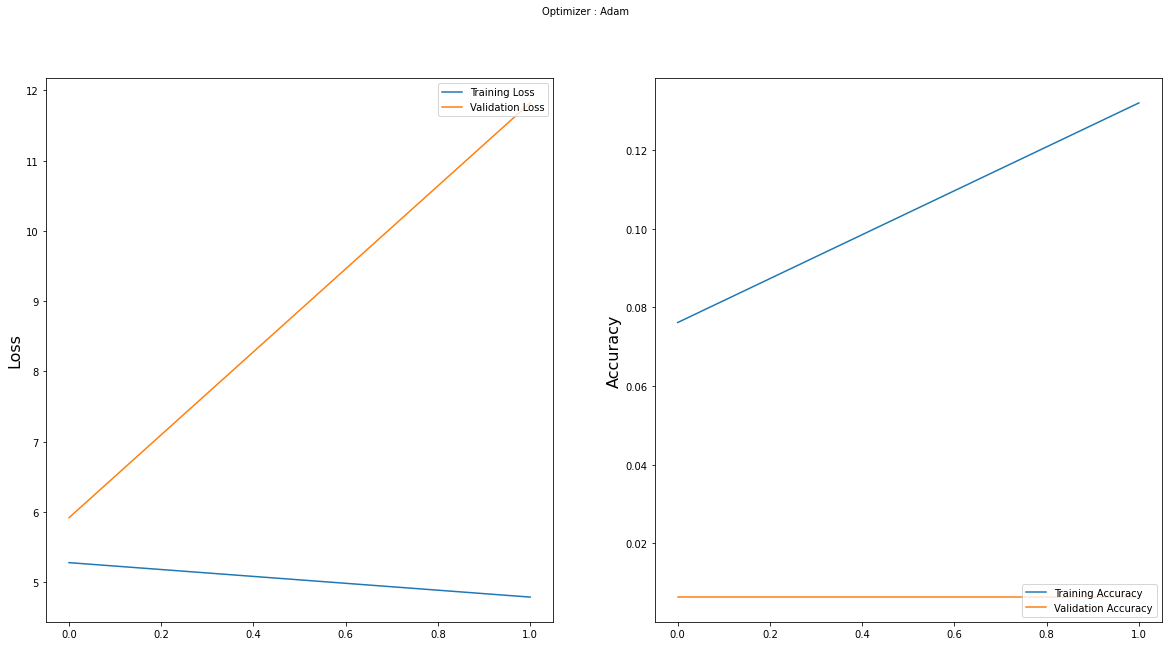

In [17]:


plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()